# Titanic Project

**Goal** is to predict if passenfer will survive or not the Titanic accident

We have three datasets

### Data Dictionary
`Survived` : Survival, 0 = No, 1 = Yes

`Pclass` : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

`Sex` : Sex

`Age` : Age in years

`SibSp` : Number of siblings / spouses aboard the Titanic

`Parch` : Number of parents / children aboard the Titanic

`Ticket` : Ticket number

`Fare` : Passenger fare

`Cabin` : Cabin number

`Embarked`: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

`Pclass`: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

`Age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp`: The dataset defines family relations in this way:

- `Sibling` = brother, sister, stepbrother, stepsister

- `Spouse` = husband, wife (mistresses and fiancés were ignored)

`Parch`: The dataset defines family relations in this way Parent = mother, father Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

*Source: Instructions*

## General Overview 

1. Understand the shape of the data 

2. Data Cleaning 

3. Data Exploration

4. Feature Enginerring

5. Data Preprocessing for Model

6. Basic Model Buiilding 

7. Model Tuning 

8. Ensemble Model Building 

9. Results




In [1]:
import numpy as np
import pandas as pd
import re
# import calendar

import seaborn as sns
import matplotlib.style as style
from pylab import rcParams


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# grid: rgb(240,240,240)
# background: rgb(200,200,200)
style.use('fivethirtyeight')
# mpl.rcParams['figure.dpi']= 150
# # plt.subplots(figsize=(11, 9))
# sns.mpl.rc("figure", figsize=(11, 9))
# rcParams['figure.figsize'] = 11.7,8.27
# plt.rcParams['figure.figsize']=(11,9) 

## Load Datasets

In [3]:
gender_df = pd.read_csv('data/gender_submission.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## 1. Understanding the shape of the data

In [4]:
def getting_to_know(df, question=None):
  '''Returns shape and columns. More info if "y" parameter is included'''
  display(df.shape)
  display(df.columns)
  if question == 'y':
      display(df.head())
      display(df.tail())
  print('--------------------------END--------------------------------')


getting_to_know(train_df, 'y')
getting_to_know(test_df , 'y')

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


--------------------------END--------------------------------


(418, 11)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


--------------------------END--------------------------------


### Project Planning

Make a rough outline of the project

- Understand nature of the data  using `.describe()`, `.info()`

- Value counts on some features of interest

- Correlation between some feature metrics

- Explore interesting subjects
  - Wealthy vs poor survival
  - Lcation by cabin
  - Age scatterplot

- Feature engineering

- Preprocess data or use some other transformer
  - k fold cross validation

- Model Baseline

- Model comparison with CV on Ensemble


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- We see less data in `age`, `Cabin`, and `Embarked`. Prove it.

## 2. Data Cleaning

For purpose of this competition, we won't drop any entire feature from the training set. However, we do want inspect and see how much `NaN` data we have.

In [7]:
# Missing values
def missing_values_func(df):
    """
    @author: Cristobal Zamorano Astudillo
    
    Personalize Missing Data Function
    
    Paramaters
    ----------
    df : DataFrame of interest
    
    Returns
    -------
    A string with counting all the features of the input DataFrame. If some values are missing, then 
    function will return a DataFrame with the following:
    - Index as the features with the missing values
    - A `Missing Values Count` Feature that tells the exact number of rows that has a misssing value in that feature index.
    - A `% of Total Values` that tells how much are the missing values of that feature with respect to the other missing values.
    """
    
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values Count', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)


    # Returns
    if mis_val_table_ren_columns.empty:
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
    else:
        display(mis_val_table_ren_columns.style.background_gradient(cmap='Reds'))
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
        
missing_values_func(train_df)

,Missing Values Count,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


'Your selected dataframe has  12 features. There are  3 features that have missing values.'

Certainly missing 687 values of the `Cabin` feature present us a problem to deal with missing values. If we decide to drop those missing rows then we would lose 77% of the data. A similar story happens witht he 20% missing values of the `Age` feature.


Divide data into categorical and numerical features and store them in variables:

In [8]:
# Check for NON Categorical features
non_categorical_feature_mask = train_df.dtypes!=object
# Filter non categorical columns using mask and turn it into a list
non_categorical_features = train_df.columns[non_categorical_feature_mask].tolist()
non_categorical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [9]:
categorical_feature_mask = train_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_df.columns[categorical_feature_mask].tolist()
categorical_cols


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Numerical data**
- Make Histograms to see distributions
- Pivot it to see the survival rate 

**Categorical data**
- Make bar chart to see different features
- Pivot it to see the survival rate 

## 3. Data Exploration

Make a correlation matrix using a covariance matrix to see if there is any specific correlation among features in the trainign dataset. Since we know that 20% of the `Age` feature are missing, we'll drop those rows for this purpose only.

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not

In [10]:
non_categ_no_target = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
metrics = train_df.loc[:, non_categ_no_target]
# metrics.drop(columns=['Survived'], inplace = True)
metrics.dropna(inplace=True)
mean_metrics = np.mean(metrics)
sd_metrics = np.std(metrics)
metrics_std = (metrics - mean_metrics) / sd_metrics 
metrics_std.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.728532,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.724670,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,-1.720808,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.716946,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-1.713084,0.911232,0.365167,-0.551703,-0.505895,-0.503850


$$\Sigma=\frac{1}{n-1}\left((\mathbf{X}-\overline{\mathbf{x}})^{T}(\mathbf{X}-\overline{\mathbf{x}})\right)$$

In [11]:
mean_vec = np.mean(metrics_std, axis=0)
cov_mat = (metrics_std - mean_vec).T.dot((metrics_std - mean_vec)) / (metrics_std.shape[0]-1)
print(f'Covariance matrix \n' ,cov_mat.shape,'\nis a square matrix')

Covariance matrix 
 (6, 6) 
is a square matrix


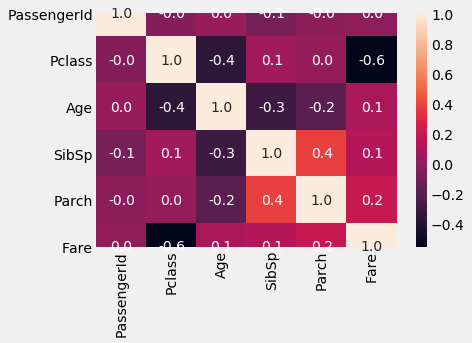

In [12]:
sns.heatmap(cov_mat, 
            xticklabels=cov_mat.columns.values,
            yticklabels=cov_mat.columns.values,
           annot=True, fmt='.1f');

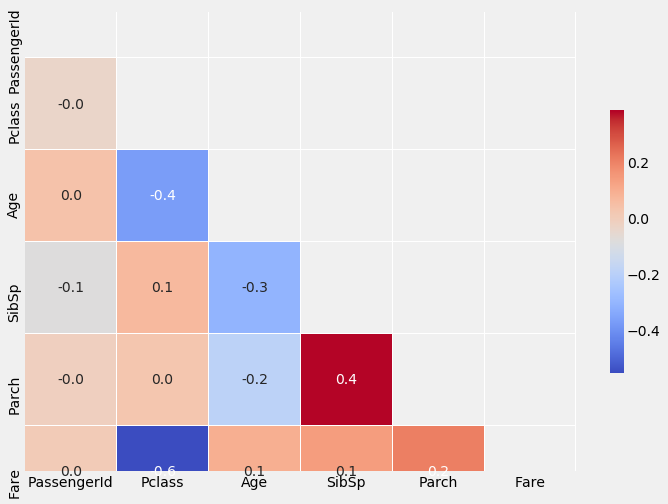

In [15]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_mat, mask=mask, cmap='coolwarm', 
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.1f');

In [14]:
# metrics = train_df.loc[:, non_categorical_features]
# metrics.drop(columns=['Survived'], inplace = True)
# metrics.dropna(inplace=True)
# corr = metrics.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# # cmap = sns.diverging_palette(240, 10, n=7, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap='coolwarm', 
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f');

**Note from Covariance Matrix** 
- The features with the highest correlation are `Parch` and `SibSP`. From Office Hours, it was explain that those features are the number of family members a passenger was traveling. It makes sense to have a correlation
    - The number of sibling and children has a negative correlation with age. However, familys tend to travel together and we see a greater correlation with the number of parents and siblings/children
- Surprisingly `Pclass` and `Fare` don't have a major correlation.

Since we are not using a Linear Regression model for this project, we are not too worry witht he colinearity of the fetures. 


In [18]:
plt.rcParams['figure.figsize']=(11,9) 

In [19]:
# for purpose of visualization, change the Survived numerical values to Died and Alive
surv_func = lambda x:'Alive' if x == 1 else 'Died'
train_df['Survived_Categorial'] = train_df['Survived'].apply(surv_func)

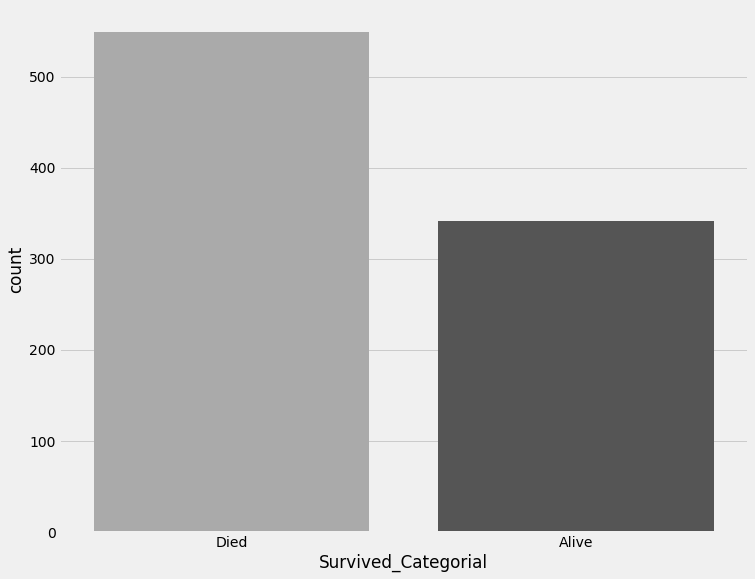

In [20]:
sns.countplot(x='Survived_Categorial', data=train_df, palette='binary');

Almost half of people did not survived from the collison with the iceberg

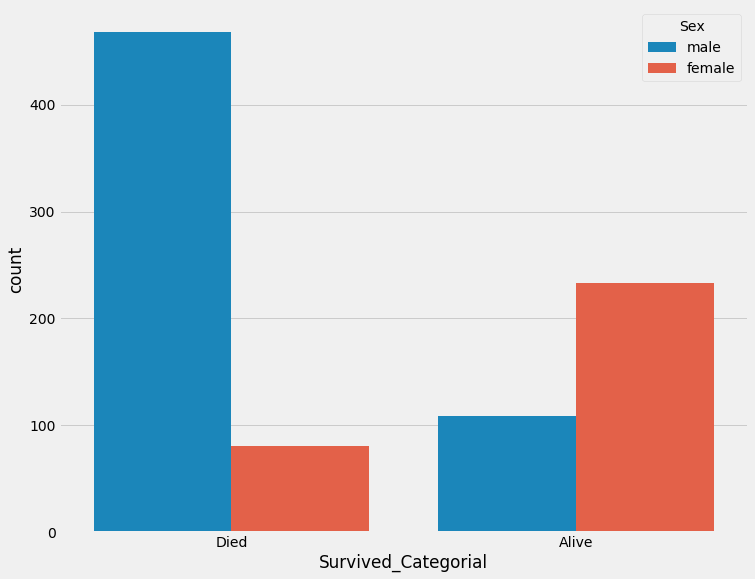

In [21]:
sns.countplot(x='Survived_Categorial', hue='Sex', data=train_df);

From the movie I remember that escape boats were prioritizing children and women. From above we see that way more male did not survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64

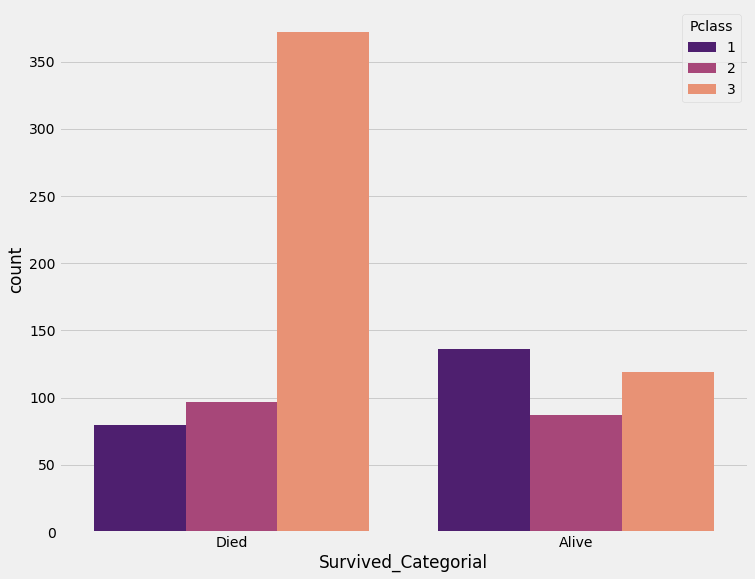

In [22]:
display(train_df['Pclass'].value_counts())
sns.countplot(x='Survived_Categorial', hue = 'Pclass', data = train_df, palette = 'magma');

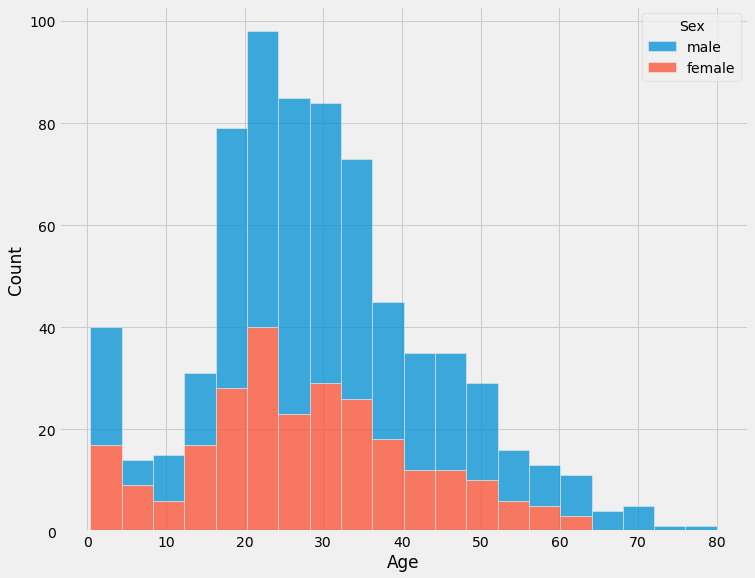

In [23]:
sns.histplot(train_df, x="Age", hue="Sex", hue_order=['male', 'female'], multiple= 'stack');

The average seems to be around 17 to 40 years old. Now put them together and see the survival difference.

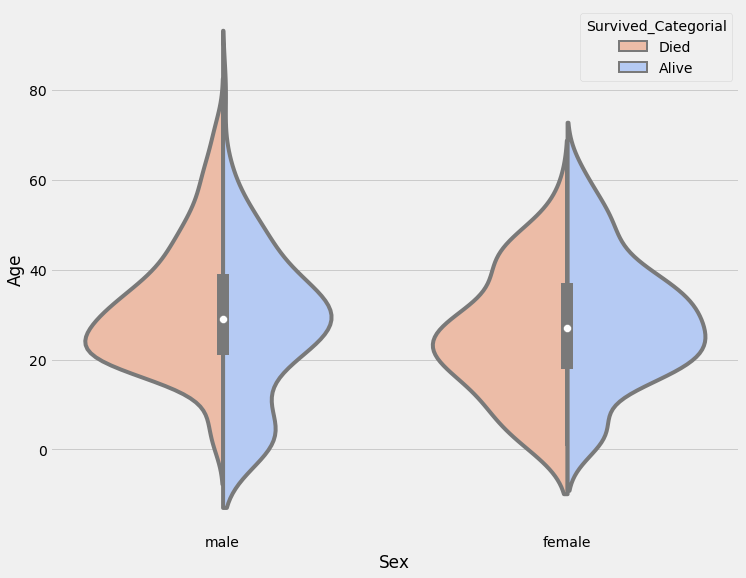

In [24]:
sns.violinplot(data = train_df, x = 'Sex', y = 'Age', hue = 'Survived_Categorial', split = True, palette = 'coolwarm_r');


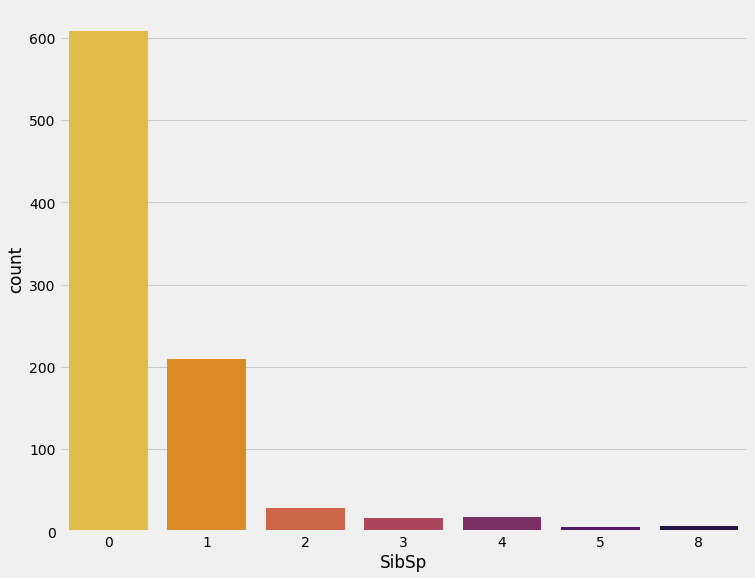

In [25]:
sns.countplot(x='SibSp', data=train_df, palette = 'inferno_r');

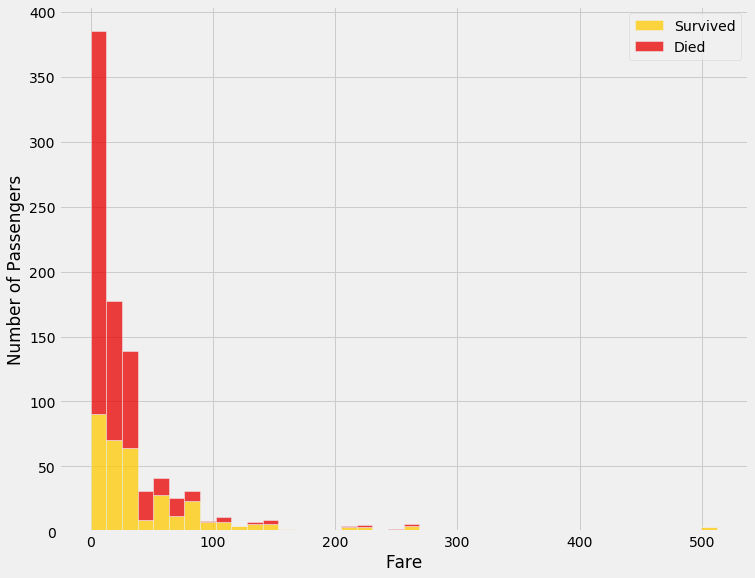

In [26]:
# fare_alive = train_df[train_df['Survived'] == 1]['Fare']
# fare_dead = train_df[train_df['Survived'] == 0]['Fare']
# sns.histplot(train_df, x=fare_alive, bins = 40, color = 'red')
# sns.histplot(train_df, x=fare_dead, bins = 40);

sns.histplot(train_df, x='Fare', bins = 40, hue = 'Survived', multiple = 'stack', palette = 'hot')
plt.ylabel('Number of Passengers')
my_labels = ['Survived', 'Died']
plt.legend(labels = my_labels);

In [43]:
# Compare Survival rate accross all numerical features.
# pivot_table : Create a spreadsheet-style pivot table as a DataFrame. Will take the mean according to
# the Index
pd.pivot_table(train_df, index = 'Survived_Categorial', values = non_categ_no_target)

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived_Categorial,,,,,,
Alive,28.491228,48.395408,0.464912,444.368421,1.950292,0.473684
Died,30.386157,22.117887,0.329690,447.016393,2.531876,0.553734


From above we can make the following notes: 
- People younger might have a higher chance of sruviving
- People that paid more also might have survived more.
- People with parents were prioritize for the escape boats (movie memeory) so they had a higher chance to survive 
- However, by having siblings you might have a higher chance of surviving.

In [ ]:
# Compare Survival rate to each categorical 

## 4. Feature Engineering

From above Exploration we see that
- Need to solve the missing values for
    - Age - random numbers using mean and sd
    - Cabin - NOT SURE YET
    - Embarked - only two values are missing so only fill those values with most common value
- We can play with famliy size and see if someone who was traveling alone from or not had higher chance to survive (Office Hours idea)
- Make categorical ranges of numerical features such as age or fare

### Family Size

/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


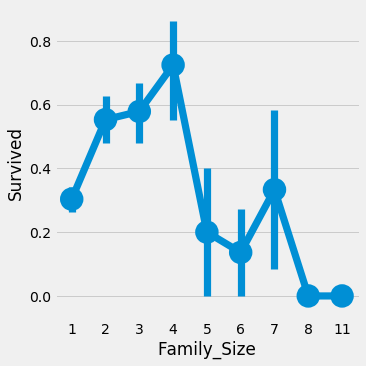

In [31]:
# Factorplot: . It provides beautiful default styles and color palettes to make statistical plots more attractive.
# It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

# # Change back Survived to Numerical 
# surv_func_num = lambda x: 0 if x == 'Alive' else 1
# train_df['Survived'] = train_df['Survived'].apply(surv_func_num)


# Adding a column Family_Size 
train_df['Family_Size'] = 1
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp'] + 1


  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size',
               y ='Survived',
               data = train_df);



from above we can define three different classes of families
- `Alone` - people traveling with 1 person (themselves)
- `Small_Family` - people traveling with 2 and 3 people
- `Medium_Family` - between 4 and 6
- `Large_Family` - 7 and more people

In [32]:
# Adding a column Alone 
train_df['Alone'] = 0
alone_func = lambda x : 1 if x == 1 else 0
train_df['Alone'] = train_df['Family_Size'].apply(alone_func)

# Adding a column Small_Family 
train_df['Small_Family'] = 0
small_fam_func = lambda x : 1 if 2 <= x <= 3 else 0
train_df['Small_Family'] = train_df['Family_Size'].apply(small_fam_func)

# Adding a column Medium_Family 
train_df['Medium_Family'] = 0
medium_fam_func = lambda x : 1 if 4 <= x <= 6 else 0
train_df['Medium_Family'] = train_df['Family_Size'].apply(medium_fam_func)

# Adding a column Large_Family 
train_df['Large_Family'] = 0
large_fam_func = lambda x : 1 if 7 <= x else 0
train_df['Large_Family'] = train_df['Family_Size'].apply(large_fam_func)

/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'poin

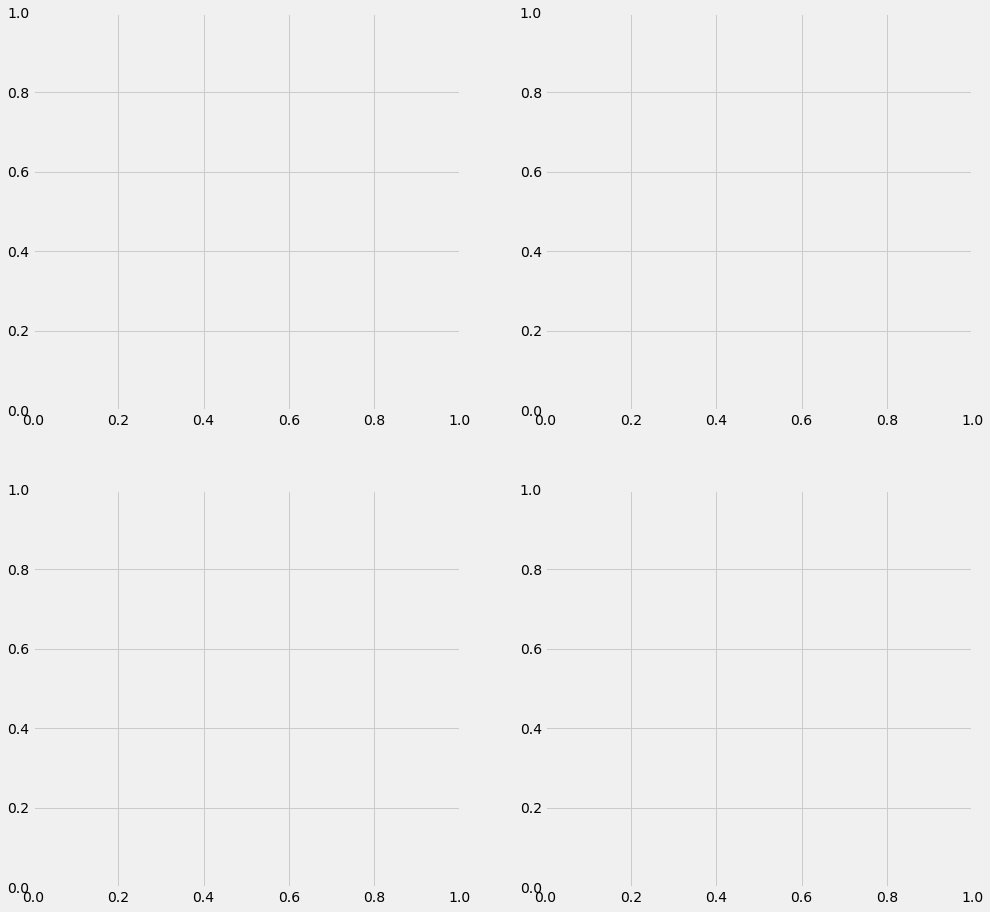

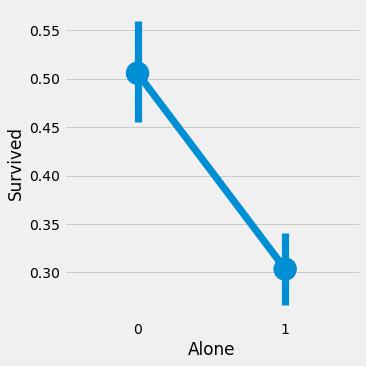

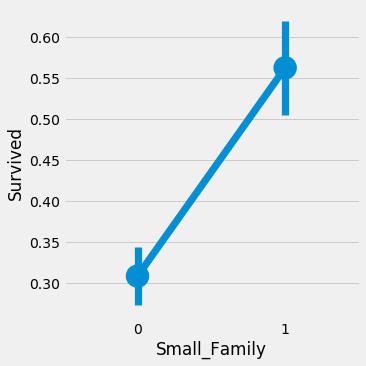

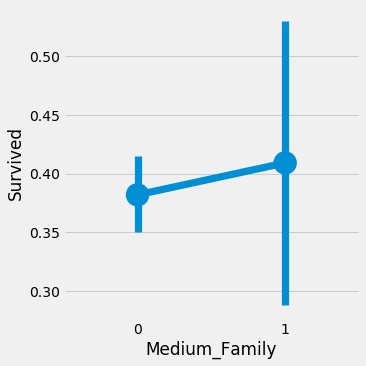

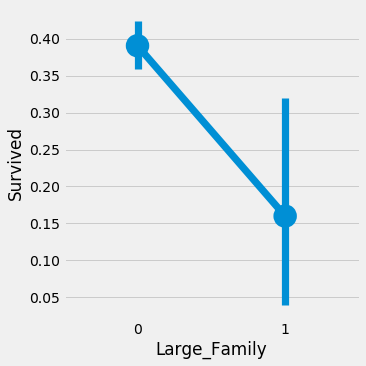

In [33]:
fig = plt.figure(figsize=(15,15))


# Factorplot for Alone
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.factorplot(x ='Alone',
               y ='Survived',
               data = train_df)

# Factorplot for Alone 
ax2 = fig.add_subplot(2, 2,2)
ax2 = sns.factorplot(x ='Small_Family',
               y ='Survived',
               data = train_df)

# Factorplot for Alone 
ax3 = fig.add_subplot(2, 2,3)
ax3 = sns.factorplot(x ='Medium_Family',
               y ='Survived',
               data = train_df)

# Factorplot for Alone 
ax4 = fig.add_subplot(2, 2,4)
ax4 = sns.factorplot(x ='Large_Family',
               y ='Survived',
               data = train_df);


### `Embarked`

In [35]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# Recall that only two rows are missing values in Embarked so let's just fill them up
train_df['Embarked'].fillna('S', inplace = True)

In [37]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# # Since not all features are categorical features,  `make_column_transformer` will only
# # one hot encode the categorical feature and the rest will passthrough
# column_trans = make_column_transformer(
#     (OneHotEncoder(sparse=False), ['Embarked']),
#     remainder = 'passthrough'
# )

# train_df = column_trans.fit_transform(train_df)
# train_df.head()

In [32]:
# The feature with most missing values is Cabin

train_df['Cabin'].fillna('Unknown', inplace=True)

train_df['Cabin'].value_counts().sort_values(ascending=False)

Unknown        687
G6               4
B96 B98          4
C23 C25 C27      4
F33              3
              ... 
D28              1
A32              1
A20              1
D30              1
C49              1
Name: Cabin, Length: 148, dtype: int64

In [30]:
train_df['Age'][np.isnan(train_df['Age'])]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [38]:
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()
age_null_count = train_df['Age'].isnull().sum()

# Return random integers from `low` (inclusive) to `high` (exclusive).
age_null_random = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
# Choose the rows that are null and fill them up
train_df['Age'][np.isnan(train_df['Age'])] = age_null_random
train_df['Age'] = train_df['Age'].astype(int)

/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
train_df['Categorical_Age'] = pd.cut(train_df['Age'], 5)

print (train_df[['Categorical_Age', 'Survived']].groupby(['Categorical_Age'], as_index=False).mean())

train_df['Categorical_Fare'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['Categorical_Fare', 'Survived']].groupby(['Categorical_Fare'], as_index=False).mean())

  Categorical_Age  Survived
0   (-0.08, 16.0]  0.527778
1    (16.0, 32.0]  0.355556
2    (32.0, 48.0]  0.371542
3    (48.0, 64.0]  0.434783
4    (64.0, 80.0]  0.090909
  Categorical_Fare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [33]:
train_df['Cabin'].value_counts().sort_index(ascending=False)

Unknown    687
T            1
G6           4
F4           2
F38          1
          ... 
A20          1
A19          1
A16          1
A14          1
A10          1
Name: Cabin, Length: 148, dtype: int64

In [34]:
train_df['Cabin'][np.isnan(train_df['Cabin'])]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''